In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visiulazation
import matplotlib.pyplot as plt

#image processing
import cv2

#extracting zippped file
import tarfile

#systems
import os
print(os.listdir("D:\\Projects\\Face Recognition\\haarcascade-frontal-faces"))
print(os.listdir("D:\\Projects\\Face Recognition\\The Labeled Faces in the Wild face recognition dataset"))

['group3.jpg', 'haarcascade_frontalface_default.xml']
['lfw-funneled.tgz', 'pairs.txt', 'pairsDevTest.txt', 'pairsDevTrain.txt']


### Face Detector Class ###

In [2]:
class FaceDetector():

    def __init__(self,faceCascadePath):
        self.faceCascade=cv2.CascadeClassifier(faceCascadePath)


    def detect(self, image, scaleFactor=1.1,
               minNeighbors=5,
               minSize=(30,30)):
        
        #function return rectangle coordinates of faces for given image
        rects=self.faceCascade.detectMultiScale(image,
                                                scaleFactor=scaleFactor,
                                                minNeighbors=minNeighbors,
                                                minSize=minSize)
        return rects

In [3]:
#Frontal face of haar cascade loaded
frontal_cascade_path="D:\\Projects\\Face Recognition\\haarcascade-frontal-faces\\haarcascade_frontalface_default.xml"

#Detector object created
fd=FaceDetector(frontal_cascade_path)

In [4]:
#An image contains faces, loaded
national_team_org=cv2.imread("D:\\Projects\\Face Recognition\\haarcascade-frontal-faces\\group3.jpg")

### Detecting Faces in National Football Team Image ###

In [5]:
def get_national_team():
    return np.copy(national_team_org)

def show_image(image):
    plt.figure(figsize=(18,15))
    #Before showing image, bgr color order transformed to rgb order
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.show()

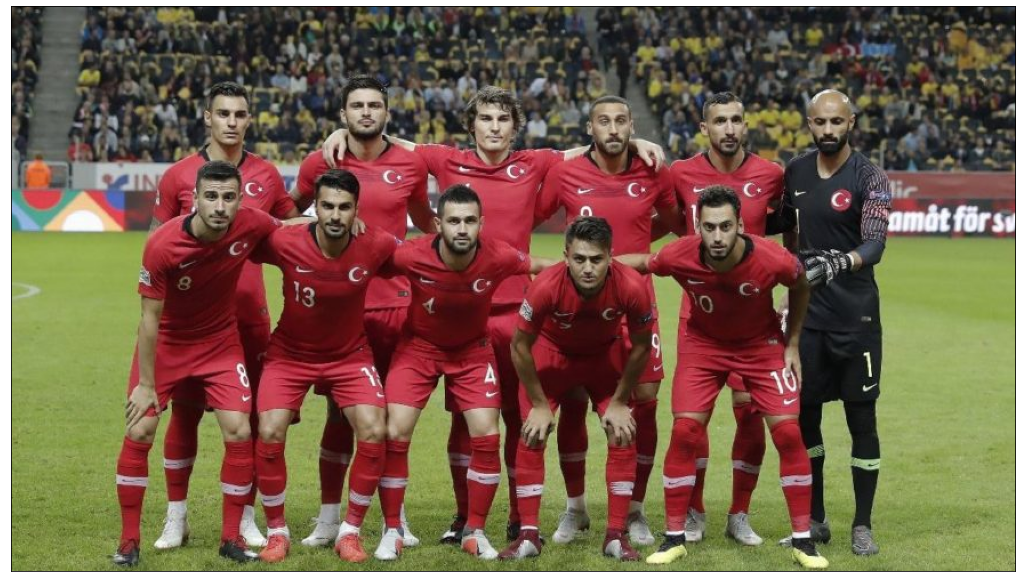

In [6]:
show_image(get_national_team())

In [7]:
def detect_face(image, scaleFactor, minNeighbors, minSize):
    # face will detected in gray image
    image_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces=fd.detect(image_gray,
                   scaleFactor=scaleFactor,
                   minNeighbors=minNeighbors,
                   minSize=minSize)

    for x, y, w, h in faces:
        #detected faces shown in color image
        cv2.rectangle(image,(x,y),(x+w, y+h),(127, 255,0),3)

    show_image(image)
    

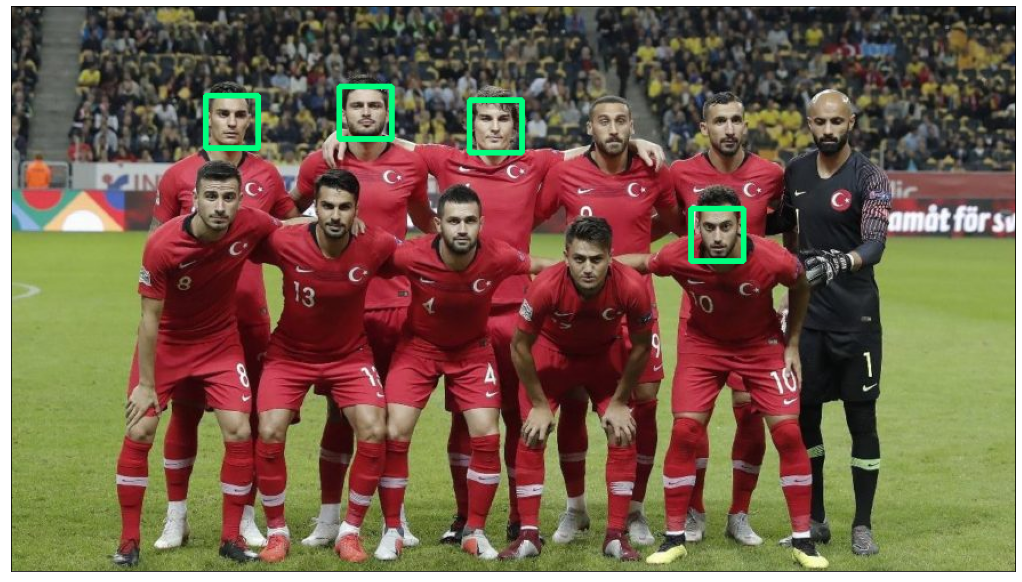

In [8]:
national_team=get_national_team()

detect_face(image=national_team, 
            scaleFactor=1.9, 
            minNeighbors=3, 
            minSize=(30,30))

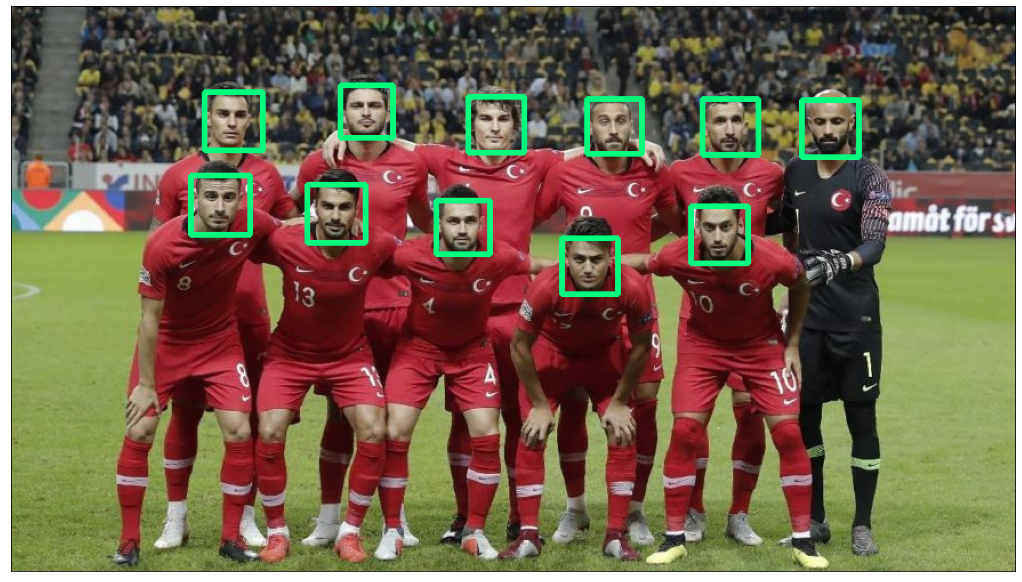

In [9]:
national_team=get_national_team()
#Let's play around function parameters
detect_face(image=national_team, 
            scaleFactor=1.3, 
            minNeighbors=3, 
            minSize=(30,30))

### Fetch The Labeled Faces in the Wild face recognition dataset class ###

In [10]:
class FetchLFW:
    def __init__(self, path):
        self.path=path
        
    def _initialize(self,dim):
        self.dim_of_photo_gallery=dim
        self.number_of_images=self.dim_of_photo_gallery*self.dim_of_photo_gallery
        
        total_number_of_image=13233
        self.random_face_indexes=np.arange(total_number_of_image)
        np.random.shuffle(self.random_face_indexes)
        self.n_random_face_indexes=self.random_face_indexes[:self.number_of_images]
        
    def get_lfw_images(self,dim=5):
        
        self._initialize(dim)
        
        
        self.lfw_images=self._get_images()
        
        return self.lfw_images
        
    
    def _get_images(self):
        image_list=[]
        tar = tarfile.open(path, "r:gz")
        counter=0
        for tarinfo in tar:
            
            tar.extract(tarinfo.name)
            if tarinfo.name[-4:]==".jpg":
                if counter in self.n_random_face_indexes:
                    image=cv2.imread(tarinfo.name, cv2.IMREAD_COLOR)
                    image=cv2.resize(image,None,fx=0.4, fy=0.4, interpolation=cv2.INTER_AREA)
                    image_list.append(np.array(image))
                counter+=1
            if tarinfo.isdir():
                pass
            else:
                os.remove(tarinfo.name)
        tar.close()
        
        return np.array(image_list)
        

### Fetch The Labeled Faces in the Wild face recognition dataset Images ###

In [12]:
path="D:\\Projects\\Face Recognition\\The Labeled Faces in the Wild face recognition dataset\\lfw-funneled.tgz"
fetchLFW=FetchLFW(path)
dimension=10
images=fetchLFW.get_lfw_images(dim=dimension)
print("The Labeled Faces in the Wild face recognition dataset Images have been fetched")

The Labeled Faces in the Wild face recognition dataset Images have been fetched


In [13]:
print(images.shape)

(100, 100, 100, 3)


### Helper Function: get_photo_gallery() ###

In [14]:
def get_photo_gallery():
    counter=0
    himages=[]
    vimages=[]
    for i in range(dimension):
        for j in range(dimension):
            
            himages.append(images[counter])
            counter+=1

        himage=np.hstack((himages))
        vimages.append(himage)
        himages=[]
    image_matrix=np.vstack((vimages))
    return image_matrix

### Showing Images as Photo Gallery ###

photo_gallery:(1000, 1000, 3)


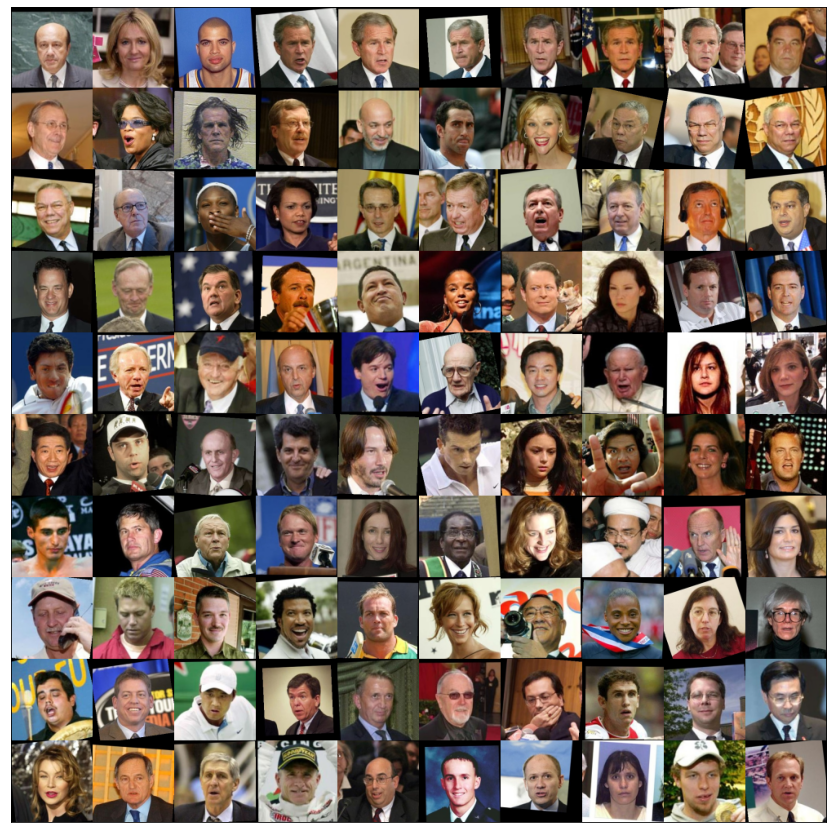

In [15]:
photo_gallery=get_photo_gallery()
print("photo_gallery:{}".format(photo_gallery.shape))
show_image(photo_gallery)

### Detecting Faces in The Labeled Faces in the Wild face recognition dataset ###

In [16]:
frontal_cascade_path="D:\\Projects\\Face Recognition\\haarcascade-frontal-faces\\haarcascade_frontalface_default.xml"
fd=FaceDetector(frontal_cascade_path)
face_counter=0
for image_org in images:
    
    image_gray=cv2.cvtColor(image_org,cv2.COLOR_BGR2GRAY)
    faceRect=fd.detect(image_gray,
                       scaleFactor=1.1,
                       minNeighbors=5,
                       minSize=(30,30))
    #print("I found {} faces".format(len(faceRect)))
    first_detection=False
    for (x,y,w,h) in faceRect:
        if first_detection==False:
            face_counter+=1
            cv2.rectangle(image_org,(x,y),(x+w,y+h),(127,255,0),2)
            first_detection=True
        else:
            print("Second detection ignored in a image")

print("{} images have been scaned".format(dimension*dimension))
print("{} faces have been detected".format(face_counter))

100 images have been scaned
99 faces have been detected


### Showing Detected Faces as Photo Gallery ###

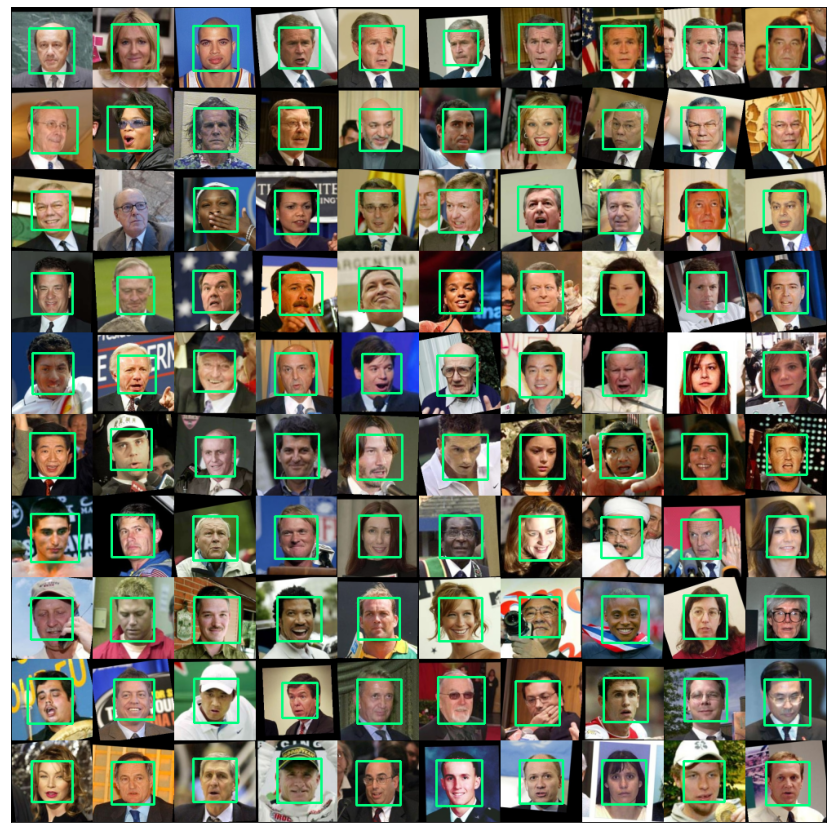

In [17]:
photo_gallery=get_photo_gallery()
show_image(photo_gallery)